In [5]:
import mne


# Load EEG data from EDF file
raw = mne.io.read_raw_edf(r'..\EEG\dataset\S001\S001R04.edf', preload=True)

new_names = {
    'Fc5.': 'FC5', 'Fc3.': 'FC3', 'Fc1.': 'FC1', 'Fcz.': 'FCz', 'Fc2.': 'FC2', 'Fc4.': 'FC4', 'Fc6.': 'FC6',
    'C5..': 'C5', 'C3..': 'C3', 'C1..': 'C1', 'Cz..': 'Cz', 'C2..': 'C2', 'C4..': 'C4', 'C6..': 'C6',
    'Cp5.': 'CP5', 'Cp3.': 'CP3', 'Cp1.': 'CP1', 'Cpz.': 'CPz', 'Cp2.': 'CP2', 'Cp4.': 'CP4', 'Cp6.': 'CP6',
    'Fp1.': 'Fp1', 'Fpz.': 'Fpz', 'Fp2.': 'Fp2',
    'Af7.': 'AF7', 'Af3.': 'AF3', 'Afz.': 'AFz', 'Af4.': 'AF4', 'Af8.': 'AF8',
    'F7..': 'F7', 'F5..': 'F5', 'F3..': 'F3', 'F1..': 'F1', 'Fz..': 'Fz', 'F2..': 'F2', 'F4..': 'F4', 'F6..': 'F6', 'F8..': 'F8',
    'Ft7.': 'FT7', 'Ft8.': 'FT8',
    'T7..': 'T7', 'T8..': 'T8', 'T9..': 'T9', 'T10.': 'T10',
    'Tp7.': 'TP7', 'Tp8.': 'TP8',
    'P7..': 'P7', 'P5..': 'P5', 'P3..': 'P3', 'P1..': 'P1', 'Pz..': 'Pz', 'P2..': 'P2', 'P4..': 'P4', 'P6..': 'P6', 'P8..': 'P8',
    'Po7.': 'PO7', 'Po3.': 'PO3', 'Poz.': 'POz', 'Po4.': 'PO4', 'Po8.': 'PO8',
    'O1..': 'O1', 'Oz..': 'Oz', 'O2..': 'O2', 
    'Iz..': 'Iz'
}

raw.rename_channels(new_names)
raw.set_montage('standard_1005')
events, event_id = mne.events_from_annotations(raw)

# Apply filters
raw.filter(1, 30)
raw.notch_filter(60)


# Epoch data
event_id = {'Stimulus': 1, 'Baseline': 2}
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8, baseline=None) 

Extracting EDF parameters from c:\Users\sanji\Desktop\EEG\dataset\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 529 samples (3.306 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.3s finished


In [16]:
from scipy import stats
# Load the data into memory
epochs.load_data()

# Select subset of electrodes for analysis
selected_channels = ['Fz', 'Cz', 'Pz']
epochs_subset = epochs.copy().pick_channels(selected_channels)

# Get the data for the 'Stimulus' and 'Baseline' conditions
data_stimulus = erp_stimulus.data
data_baseline = erp_baseline.data

# Calculate the difference waveform (Stimulus - Baseline)
erp_difference = mne.combine_evoked([erp_stimulus, erp_baseline], weights=[1, -1])


# Perform the t-test
t_values, p_values = stats.ttest_rel(data_stimulus, data_baseline, axis=-1)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\sanji\AppData\Local\Temp\ipykernel_9696\3584200168.py:7: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_subset = epochs.copy().pick_channels(selected_channels)


ValueError: where size (3) does not match x size (161)

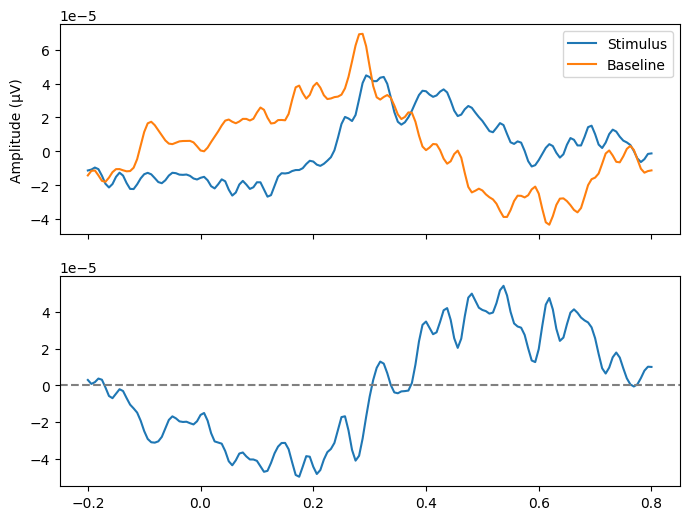

In [17]:
import matplotlib.pyplot as plt


# Plot ERP waveforms and difference waveform
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
times = erp_stimulus.times


# Plot individual condition ERPs
ax1.plot(times, erp_stimulus.data[0], label='Stimulus')
ax1.plot(times, erp_baseline.data[0], label='Baseline')
ax1.set_ylabel('Amplitude (µV)')
ax1.legend()


# Plot difference waveform and statistical results
ax2.plot(times, erp_difference.data[0], label='Difference')
ax2.axhline(0, color='gray', linestyle='--')
ax2.fill_between(times, 0, erp_difference.data[0], where=p_values < 0.05, color='red', alpha=0.5)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude Difference (µV)')
ax2.legend()


plt.tight_layout()
plt.show() 